In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [11]:
#Lectura del Dataset

url = 'https://www.dropbox.com/scl/fi/32xdaqm2545076rnbl577/df_final.csv?rlkey=qm00csccin2nr6xwmahwtq4f8&st=zigaetql&dl=1'

df = pd.read_csv(url)
df.head(2)

/tmp/ipykernel_2551/2344250714.py:5: DtypeWarning: Columns (6,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,id,occurrenceID,catalogNumber,basisOfRecord,collectionCode,dynamicProperties,otherCatalogNumbers,genus,specificEpithet,infraspecificEpithet,...,creator,accessURI,format,variantLiteral,description,caption,resourceCreationTechnique,captureDevice,physicalSetting,license_y
0,999980@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC999980,HumanObservation,Wildlife sounds - Birds,"{""recordingDevice"":""Tascam DR-05X""}",NaN,Saxicola,rubicola,NaN,...,Colm Philpott,https://xeno-canto.org/sounds/uploaded/FIMCRHL...,audio/wav,ac:BestQuality,128 s,NaN,automatic recording: no; bitrate: 1411200 bps;...,Tascam DR-05X |,Artificial,CC BY-NC-SA 4.0
1,999946@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC999946,HumanObservation,Wildlife sounds - Birds,"{""recordingDevice"":""Olympus LS12"",""microphone""...",NaN,Haematopus,ostralegus,NaN,...,Paul Coiffard,https://xeno-canto.org/sounds/uploaded/TLORJJU...,audio/wav,ac:BestQuality,9 s,NaN,automatic recording: no; bitrate: 1058400 bps;...,Olympus LS12 | Primo EM272,Natural,CC BY-NC-SA 4.0


In [12]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279509 entries, 0 to 279508
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              279509 non-null  object 
 1   occurrenceID                    279509 non-null  object 
 2   catalogNumber                   279509 non-null  object 
 3   basisOfRecord                   279509 non-null  object 
 4   collectionCode                  279509 non-null  object 
 5   dynamicProperties               74871 non-null   object 
 6   otherCatalogNumbers             358 non-null     object 
 7   genus                           279509 non-null  object 
 8   specificEpithet                 279509 non-null  object 
 9   infraspecificEpithet            21846 non-null   object 
 10  scientificName                  279509 non-null  object 
 11  taxonRank                       279509 non-null  object 
 12  kingdom         

In [13]:
df['country'].unique()

array(['Ireland', 'France', 'Spain', 'Ukraine', 'Sweden', 'Germany',
       'United Kingdom', 'Belgium', 'Netherlands', 'Poland', 'Italy',
       'Norway', 'Latvia', 'Greece', 'Belarus', 'Denmark', 'Switzerland',
       'Hungary', 'Bulgaria', 'Russian Federation', 'Romania', 'Turkey',
       'Finland', 'Croatia', 'Portugal', 'Austria', 'Czech Republic',
       'Slovenia', 'Slovakia', 'Estonia', 'Bosnia Herzegovina', 'Cyprus',
       'Andorra', 'Serbia', 'Montenegro', 'Albania', 'Luxembourg',
       'San Marino', 'Lithuania', 'Macedonia', nan, 'Liechtenstein',
       'Malta', 'Moldova', 'Monaco'], dtype=object)

In [14]:
#Duplicados 

# Revisar si hay filas duplicadas completas
duplicados = df.duplicated()
print(duplicados.value_counts())

False    279509
Name: count, dtype: int64


Se confirma que el Dataset no tiene duplicados

In [15]:
#Se confirma que el dataset tiene enlaces de sonidos solamente
print(df['format'].unique())

['audio/wav' 'audio/mp3']


In [18]:
pd.set_option('display.max_rows', None)
df['scientificName'].value_counts()


scientificName
Mystery mystery                        11080
Parus major                             7100
Turdus merula                           6853
Erithacus rubecula                      6101
Fringilla coelebs                       5767
Phylloscopus collybita                  4980
Sylvia atricapilla                      4884
Turdus philomelos                       4704
Troglodytes troglodytes                 4336
Cyanistes caeruleus                     3678
Emberiza calandra                       3141
Strix aluco                             3095
Turdus iliacus                          3086
Phylloscopus trochilus                  3030
Emberiza citrinella                     2832
Rallus aquaticus                        2722
Corvus cornix cornix                    2711
Curruca communis                        2705
Dendrocopos major                       2672
Loxia curvirostra                       2659
Luscinia megarhynchos                   2544
Fulica atra                             

In [ ]:
df['scientificName'].nunique()
#Son 180 especies

180

In [25]:
#Ver el url completo para el acceso al trinal del ave

pd.set_option('display.max_colwidth', None) # para que pandas muestre columnas completas

print(df['accessURI'].iloc[0]) #para que muestre valor completo 



https://xeno-canto.org/sounds/uploaded/FIMCRHLLRP/XC999980-17-40-Stonechat%2C-small-road.wav


In [ ]:
df.info

In [ ]:
#Seleccion de columnas

df_seleccionado = df[['scientificName', 'genus', 'specificEpithet']]

El Dataset tiene

1. Paises de Europa
2. Nombres de Especies con mas de 500 registros  y 181 tipos de especies
3. Solamente filas con archivos de sonidos mp3 o wav
4. Tiene 279509 y 53 columnas 

ANALISIS UNIVARIABLE 

Variables categoricas

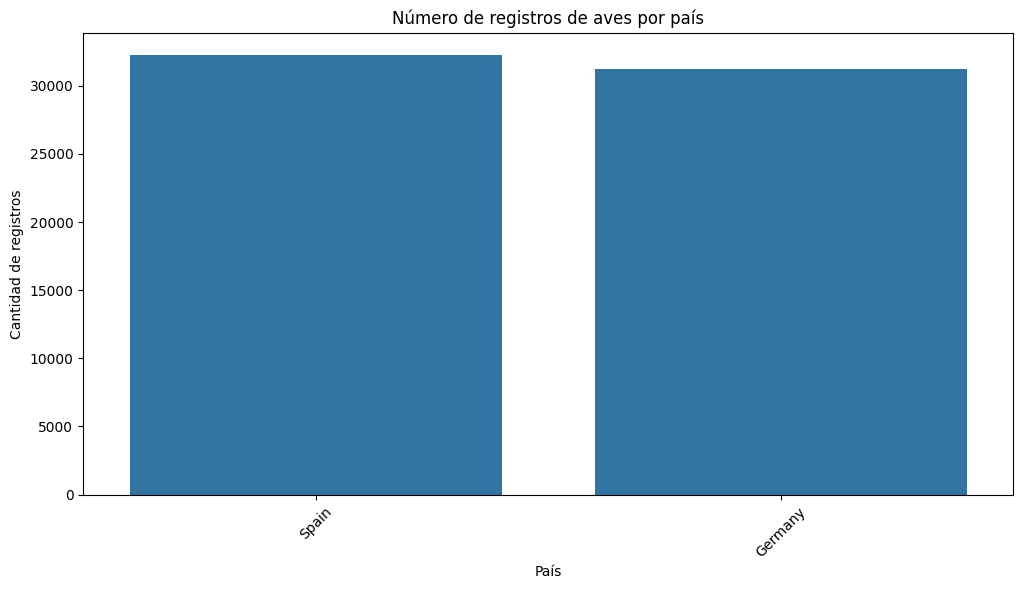

In [75]:

plt.figure(figsize=(12,6))
sns.countplot(data=df_grouped, x='country', order=df_grouped['country'].value_counts().index)
plt.title("Número de registros de aves por país")
plt.xlabel("País")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)  
plt.show()

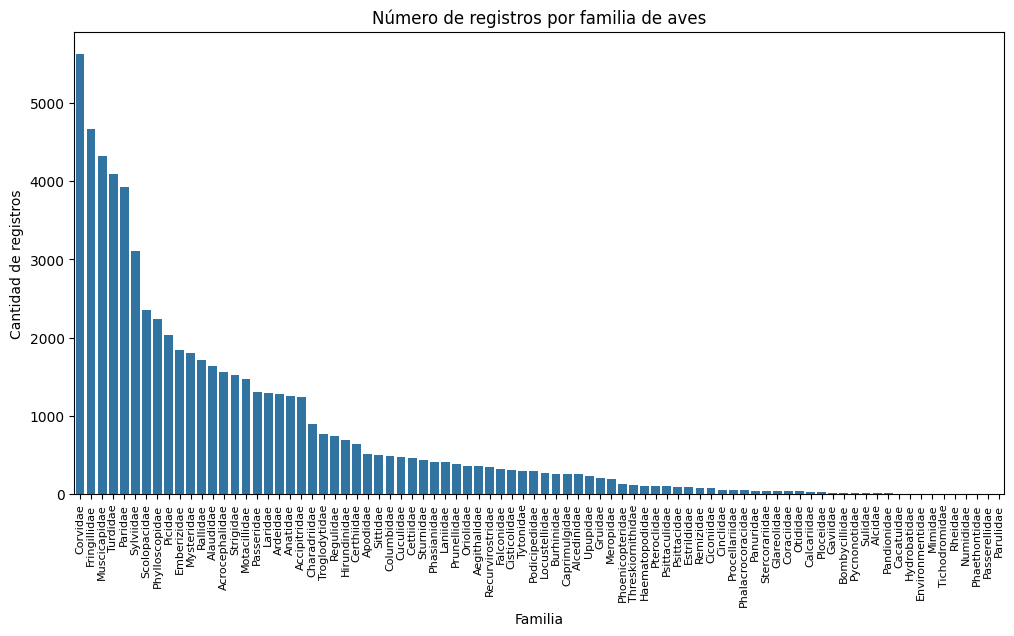

In [76]:
# Ver las familias de aves en el dataset 

# Contar cuántos registros hay por familia
family_counts = df_grouped['family'].value_counts()

# Crear gráfico de barras vertical
plt.figure(figsize=(12,6))
sns.barplot(x=family_counts.index, y=family_counts.values)
plt.title("Número de registros por familia de aves")
plt.xlabel("Familia")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=90, fontsize=8)  # rotar nombres para que se vean
plt.show()

/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/python/3.12.1/lib/python3.12/site-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


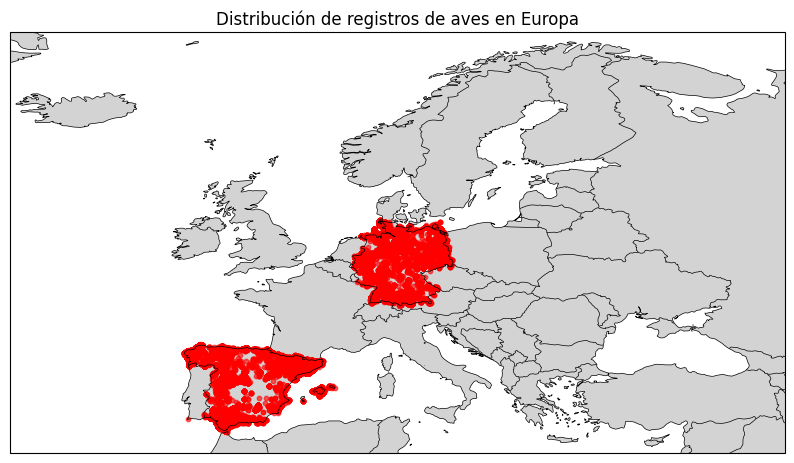

In [80]:

plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Limites de Europa
ax.set_extent([-25, 45, 34, 72], crs=ccrs.PlateCarree())

# Agregar continente y países
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)

# Graficar los puntos de aves
plt.scatter(
    df_grouped['longitudeDecimal'],
    df_grouped['latitudeDecimal'],
    c='red',
    s=10,
    alpha=0.6,
    transform=ccrs.PlateCarree()
)

plt.title("Distribución de registros de aves en Europa")
plt.show()